### Project Description:

From Insta Influencers datset, Answer the given five questions,

    1 Name Max co-efficent of Co-Related features   
    2 Frequency Distributions of Features namely i)Influence Score,ii)Followers iii)Posts  
    3 Count of Instagram influencers in different countries   
    4 Top 10 influencers based on i)Followers,ii)Average likes iii)Total Likes
    5 Relationship between i)Followers and Total Likes ii)Followers and Influence Score iii)Posts and Average likes iv)Posts and Influence Score

### Importing Libraries:

In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/Admin PC/Downloads/top_insta_influencers_data.csv")

In [3]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


## Pre Processing and EDA:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


In [5]:
df.describe() # here other columns are in string data, that's why it is not showing

,rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [6]:
# Removing the null values 
df.dropna(inplace=True)

In [7]:
df
# Here index after dropping never update as new index,Old index is retained. That's why it's showing 199 at the bottom 
# But when you check it shows only 138 rows, So Null values rows are deleted

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5.6k,329.2m,3.5m,0.88%,2.9m,19.9b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [8]:
df['posts']

0       3.3k
1       6.9k
3       1.8k
4       6.8k
5       5.6k
       ...  
195     2.3k
196     3.8k
197    0.77k
198     2.3k
199     4.2k
Name: posts, Length: 138, dtype: object

In [9]:
# Converting posts variables datatype from str to float and replace 'k' by multiplying 1000
posts=list(df['posts'])
posts1=[]
for num in posts:
    num=1000*float(num.replace('k',''))
    posts1.append(num)
posts1
    

[3300.0,
 6900.0,
 1800.0,
 6800.0,
 5600.0,
 5000.0,
 2000.0,
 4100.0,
 7400.0,
 660.0,
 10000.0,
 950.0,
 530.0,
 3200.0,
 6400.0,
 4400.0,
 5300.0,
 8200.0,
 3500.0,
 1600.0,
 80.0,
 4800.0,
 10000.0,
 6900.0,
 5200.0,
 7300.0,
 1300.0,
 1700.0,
 1800.0,
 3600.0,
 3600.0,
 3300.0,
 1500.0,
 2900.0,
 2300.0,
 12900.0,
 2500.0,
 540.0,
 1800.0,
 260.0,
 2900.0,
 340.0,
 1200.0,
 1000.0,
 7000.0,
 780.0,
 2900.0,
 1400.0,
 17500.0,
 5100.0,
 8200.0,
 2400.0,
 10000.0,
 9900.0,
 2700.0,
 10000.0,
 2700.0,
 280.0,
 2000.0,
 880.0,
 3300.0,
 1300.0,
 660.0,
 3200.0,
 5600.0,
 1200.0,
 420.0,
 3600.0,
 2100.0,
 10000.0,
 10300.0,
 2400.0,
 420.0,
 2700.0,
 1100.0,
 6400.0,
 2500.0,
 8900.0,
 6500.0,
 6500.0,
 170.0,
 2300.0,
 590.0,
 4200.0,
 10000.0,
 160.0,
 5200.0,
 3200.0,
 3200.0,
 20.0,
 16900.0,
 1800.0,
 1500.0,
 4900.0,
 1900.0,
 580.0,
 10000.0,
 8900.0,
 3000.0,
 4400.0,
 3000.0,
 1400.0,
 1700.0,
 1800.0,
 2100.0,
 2000.0,
 4500.0,
 10000.0,
 2300.0,
 11600.0,
 5100.0,
 13400.0

In [10]:
type(posts1[0])

float

In [11]:
df['posts']=posts1

In [12]:
df["posts"]

0      3300.0
1      6900.0
3      1800.0
4      6800.0
5      5600.0
        ...  
195    2300.0
196    3800.0
197     770.0
198    2300.0
199    4200.0
Name: posts, Length: 138, dtype: float64

In [13]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6900.0,366.2m,8.3m,1.62%,5.9m,57.4b,United States
3,4,selenagomez,93,1800.0,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6800.0,334.1m,1.9m,0.20%,665.3k,12.5b,United States
5,6,kimkardashian,91,5600.0,329.2m,3.5m,0.88%,2.9m,19.9b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3800.0,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,770.0,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2300.0,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               138 non-null    int64  
 1   channel_info       138 non-null    object 
 2   influence_score    138 non-null    int64  
 3   posts              138 non-null    float64
 4   followers          138 non-null    object 
 5   avg_likes          138 non-null    object 
 6   60_day_eng_rate    138 non-null    object 
 7   new_post_avg_like  138 non-null    object 
 8   total_likes        138 non-null    object 
 9   country            138 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 11.9+ KB


In [15]:
new_avg=list(df['new_post_avg_like'])
new_avg  # To see the labels of new_avg column

['6.5m',
 '5.9m',
 '3.3m',
 '665.3k',
 '2.9m',
 '3.9m',
 '2.0m',
 '926.9k',
 '1.5m',
 '5.1m',
 '159.3k',
 '181.8k',
 '2.3m',
 '1.4m',
 '1.0m',
 '1.3m',
 '1.9m',
 '115.2k',
 '4.8m',
 '1.5m',
 '363.4k',
 '0',
 '81.7k',
 '588.3k',
 '1.3m',
 '255.9k',
 '1.1m',
 '586.5k',
 '482.3k',
 '1.2m',
 '802.9k',
 '1.9m',
 '340.9k',
 '29.8k',
 '370.1k',
 '196.9k',
 '2.0m',
 '2.0m',
 '2.1m',
 '1.5m',
 '325.7k',
 '0',
 '3.6m',
 '1.5m',
 '339.0k',
 '189.4k',
 '1.4m',
 '0',
 '366.6k',
 '426.2k',
 '696.3k',
 '718.8k',
 '322.2k',
 '241.6k',
 '323.1k',
 '248.6k',
 '448.3k',
 '5.0m',
 '918.9k',
 '2.1m',
 '5.7m',
 '462.6k',
 '4.4m',
 '1.1m',
 '266.5k',
 '693.9k',
 '1.1m',
 '531.6k',
 '971.7k',
 '56.3k',
 '774.2k',
 '16.8k',
 '1.9m',
 '604.4k',
 '363.9k',
 '452.9k',
 '1.7m',
 '72.4k',
 '131.8k',
 '40.5k',
 '841.4k',
 '133.0k',
 '2.9m',
 '292.9k',
 '12.4k',
 '4.0m',
 '259.4k',
 '2.6m',
 '311.5k',
 '455.3k',
 '52.8k',
 '199.8k',
 '294.1k',
 '303.9k',
 '640.5k',
 '1.6m',
 '139.3k',
 '7.7k',
 '444.2k',
 '181.0k',
 

In [16]:
# Converting every feature from str to float and decoding k(Thosand) as 1000,m(Million) as 1,000,000, b(Billion ) as 1,000,000,000 
followers=list(df['followers'])
followers1=[]
for each in followers:
    if 'm' in each:   # In followers only m is there
        each=1000000*float(each.replace('m',''))
        followers1.append(each)
    else:
        each=float(each)
        followers1.append(each)
df['followers']=followers1


avg_likes=list(df['avg_likes'])
avg_likes1=[]
for each in avg_likes: #In Avg likes column, there are million(m),Thousand(k) 
    if 'm' in each:
        each=1000000*float(each.replace('m',''))
        avg_likes1.append(each)
        
    elif 'k' in each:
        each=1000*float(each.replace('k',''))
        avg_likes1.append(each)
    else:
        each=float(each)
        avg_likes1.append(each)
df['avg_likes']=avg_likes1

new_post_avg_like=list(df['new_post_avg_like'])
new_post_avg_like1=[]
for each in new_post_avg_like:
    if 'm' in each:
        each=1000000*float(each.replace('m',''))
        new_post_avg_like1.append(each)
        
    else:
        each=1000*float(each.replace('k',''))
        new_post_avg_like1.append(each) 
df['new_post_avg_like']=new_post_avg_like1


eng_rate=list(df['60_day_eng_rate'])
eng_rate1=[]
for each in eng_rate:
    each=float(each.replace('%',''))
    eng_rate1.append(each)    
df['60_day_eng_rate']=eng_rate1

total_likes=list(df['total_likes'])
total_likes1=[]
for each in total_likes:
    if 'm' in each:
        each=1000000*float(each.replace('m',''))
        total_likes1.append(each)
        
    elif 'b' in each:
        each=1000000000*float(each.replace('b',''))
        total_likes1.append(each)
df['total_likes']=total_likes1
    




In [17]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09,United States
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09,France
197,198,luansantana,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08,Brazil
198,199,nickjonas,78,2300.0,33000000.0,719600.0,1.42,467700.0,1.700000e+09,United States


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rank               138 non-null    int64  
 1   channel_info       138 non-null    object 
 2   influence_score    138 non-null    int64  
 3   posts              138 non-null    float64
 4   followers          138 non-null    float64
 5   avg_likes          138 non-null    float64
 6   60_day_eng_rate    138 non-null    float64
 7   new_post_avg_like  138 non-null    float64
 8   total_likes        138 non-null    float64
 9   country            138 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 11.9+ KB


### 1) To find max co- eff:

In [23]:
df.corr() # For finding co-relation between features

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
rank,1.000000,-0.487032,-0.038108,-0.702439,-0.455890,-0.007923,-0.402640,-0.467826
influence_score,-0.487032,1.000000,0.162550,0.443995,0.210109,-0.107452,0.170787,0.297215
posts,-0.038108,0.162550,1.000000,0.047782,-0.319911,-0.357878,-0.253575,0.193972
followers,-0.702439,0.443995,0.047782,1.000000,0.610347,-0.093967,0.523557,0.694309
avg_likes,-0.455890,0.210109,-0.319911,0.610347,1.000000,0.495045,0.871394,0.667124
60_day_eng_rate,-0.007923,-0.107452,-0.357878,-0.093967,0.495045,1.000000,0.707013,0.054885
new_post_avg_like,-0.402640,0.170787,-0.253575,0.523557,0.871394,0.707013,1.000000,0.579299
total_likes,-0.467826,0.297215,0.193972,0.694309,0.667124,0.054885,0.579299,1.000000


In [26]:
df.corr()

rank                 1.0
influence_score      1.0
posts                1.0
followers            1.0
avg_likes            1.0
60_day_eng_rate      1.0
new_post_avg_like    1.0
total_likes          1.0
dtype: float64

## 2) Frequency Distributions :

(array([ 3.,  1.,  0.,  1.,  1.,  3., 14., 37., 54., 24.]),
 array([41. , 46.2, 51.4, 56.6, 61.8, 67. , 72.2, 77.4, 82.6, 87.8, 93. ]),
 <BarContainer object of 10 artists>)

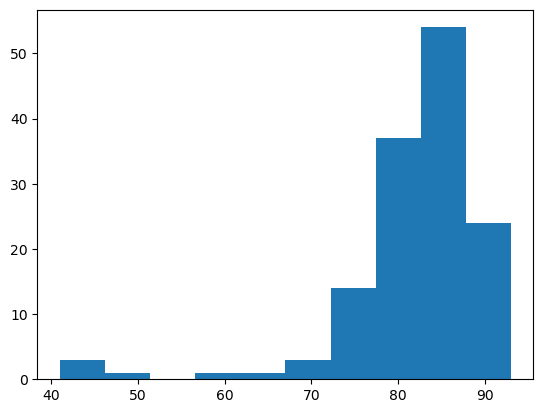

In [27]:
import matplotlib.pyplot as plt
plt.hist(df['influence_score'])
# x axis-->

(array([42., 38., 20., 12.,  7., 14.,  1.,  2.,  0.,  2.]),
 array([   20.,  1768.,  3516.,  5264.,  7012.,  8760., 10508., 12256.,
        14004., 15752., 17500.]),
 <BarContainer object of 10 artists>)

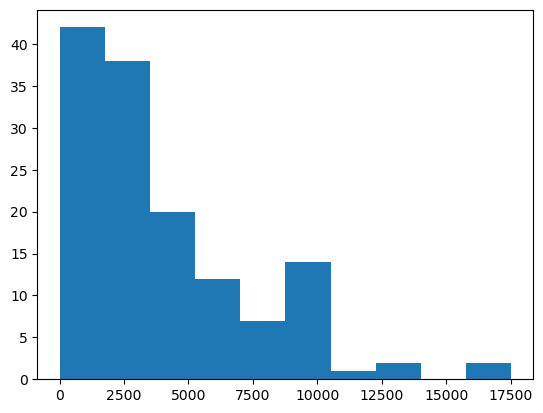

In [28]:
plt.hist(df['posts'])

(array([107.,   7.,   7.,   3.,   5.,   3.,   4.,   1.,   0.,   1.]),
 array([3.280e+07, 7.710e+07, 1.214e+08, 1.657e+08, 2.100e+08, 2.543e+08,
        2.986e+08, 3.429e+08, 3.872e+08, 4.315e+08, 4.758e+08]),
 <BarContainer object of 10 artists>)

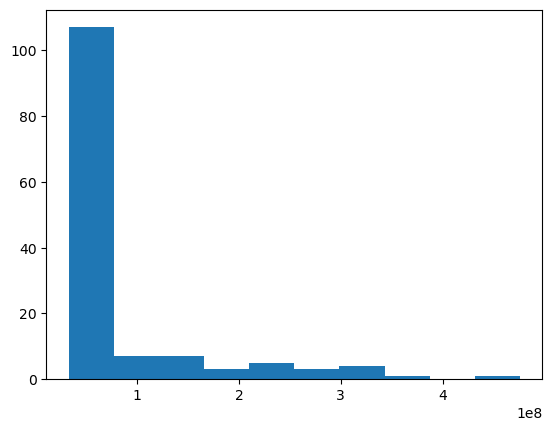

In [29]:
plt.hist(df['followers'])

# 3) Bar chart countrywise:

In [46]:
# For plotting bar chart, we should have x and y i.e unique countries name and its counts in dictionary
d=dict(df['country'].value_counts())
d

{'United States': 66,
 'Brazil': 13,
 'India': 12,
 'Indonesia': 7,
 'France': 6,
 'Spain': 5,
 'United Kingdom': 4,
 'Colombia': 3,
 'Canada': 3,
 'Mexico': 2,
 'Turkey': 2,
 'Netherlands': 2,
 'Switzerland': 1,
 'Germany': 1,
 'Czech Republic': 1,
 'British Virgin Islands': 1,
 'Sweden': 1,
 'Australia': 1,
 'Anguilla': 1,
 "CÃ´te d'Ivoire": 1,
 'Puerto Rico': 1,
 'United Arab Emirates': 1,
 'Italy': 1,
 'Uruguay': 1,
 'Russia': 1}

([<matplotlib.axis.XTick at 0x1b3c44f6640>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

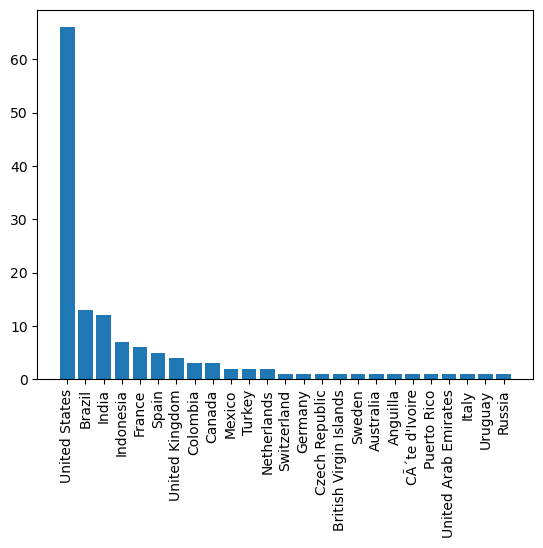

In [54]:
plt.bar((d.keys()),(d.values()))
# Rotation of the bars names
plt.xticks(list(d.keys()), rotation=90)


In [ ]:
# From the graph, United states has maximum insta influencers

### 4) Top 10 influencers based on i)Followers,ii)Average likes iii)Total Likes

In [55]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40,464700.0,1.400000e+09,United States
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.64,208000.0,1.500000e+09,France
197,198,luansantana,79,770.0,33200000.0,193300.0,0.26,82600.0,1.492000e+08,Brazil
198,199,nickjonas,78,2300.0,33000000.0,719600.0,1.42,467700.0,1.700000e+09,United States


In [58]:

# Sorting based on 'followrs' column
df.sort_values(by=['followers'], ascending=False).head(10)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,1.840000e+10,United States
7,8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7.400000e+09,United States
8,9,khloekardashian,89,4100.0,268300000.0,2400000.0,0.35,926900.0,9.800000e+09,United States
9,10,justinbieber,91,7400.0,254500000.0,1900000.0,0.59,1500000.0,1.390000e+10,Canada
10,11,kendalljenner,90,660.0,254000000.0,5500000.0,2.04,5100000.0,3.700000e+09,United States


In [59]:

# Sorting Top 10 influencers based on 'Avg_likes' column
df.sort_values(by=['avg_likes'], ascending=False).head(10)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States
22,23,zendaya,87,3500.0,150700000.0,5800000.0,3.17,4800000.0,2.060000e+10,United States
10,11,kendalljenner,90,660.0,254000000.0,5500000.0,2.04,5100000.0,3.700000e+09,United States
118,119,zayn,82,160.0,46500000.0,4700000.0,8.81,4000000.0,7.735000e+08,United States
97,98,adele,84,420.0,50700000.0,4700000.0,3.82,1900000.0,2.000000e+09,United States
114,115,harrystyles,57,590.0,46900000.0,4700000.0,6.38,2900000.0,2.800000e+09,United States
56,57,bts.bighitofficial,78,1200.0,66900000.0,4100000.0,5.40,3600000.0,4.900000e+09,Uruguay
75,76,milliebobbybrown,80,280.0,57600000.0,4000000.0,8.63,5000000.0,1.100000e+09,United States


In [61]:
# Sorting Top 10 influencers based on 'Avg_likes' column
df.sort_values(by=['total_likes'], ascending=False).head(10)

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62,5900000.0,5.740000e+10,United States
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
22,23,zendaya,87,3500.0,150700000.0,5800000.0,3.17,4800000.0,2.060000e+10,United States
5,6,kimkardashian,91,5600.0,329200000.0,3500000.0,0.88,2900000.0,1.990000e+10,United States
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,1.840000e+10,United States
25,26,badgalriri,88,4800.0,135300000.0,3700000.0,0.02,0.0,1.790000e+10,United States
19,20,neymarjr,90,5300.0,177100000.0,2700000.0,1.09,1900000.0,1.410000e+10,Brazil
9,10,justinbieber,91,7400.0,254500000.0,1900000.0,0.59,1500000.0,1.390000e+10,Canada
16,17,nickiminaj,90,6400.0,201600000.0,2100000.0,0.53,1000000.0,1.350000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20,665300.0,1.250000e+10,United States


### 5)Relationship between i)Followers and Total Likes ii)Followers and Influence Score iii)Posts and Average likes iv)Posts and Influence Score

Text(0, 0.5, 'Total Likes ')

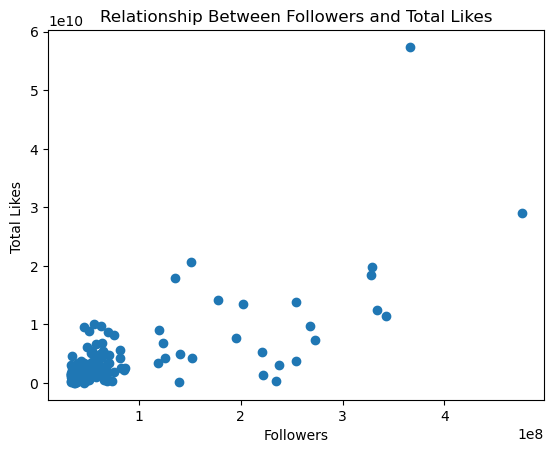

In [64]:
plt.scatter(df['followers'],df['total_likes'])
plt.title('Relationship Between Followers and Total Likes')
plt.xlabel("Followers")
plt.ylabel("Total Likes ")

Text(0, 0.5, 'influence_score ')

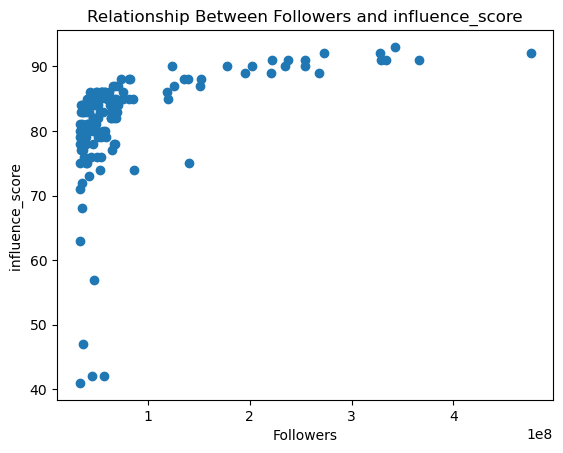

In [67]:
plt.scatter(df['followers'],df['influence_score'])
plt.title('Relationship Between Followers and influence_score')
plt.xlabel("Followers")
plt.ylabel("influence_score ")

Text(0, 0.5, 'avg Likes ')

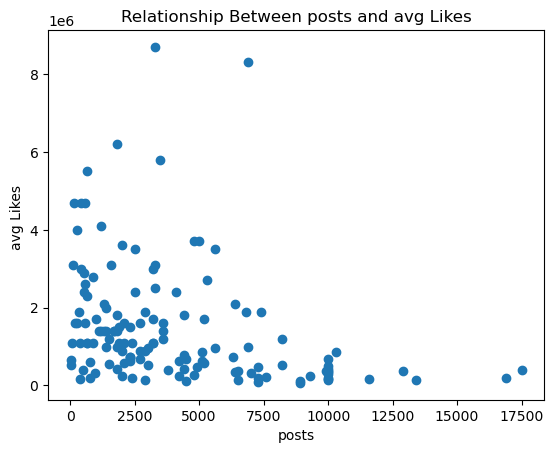

In [65]:
plt.scatter(df['posts'],df['avg_likes'])
plt.title('Relationship Between posts and avg Likes')
plt.xlabel("posts")
plt.ylabel("avg Likes ")

Text(0, 0.5, 'influence_score')

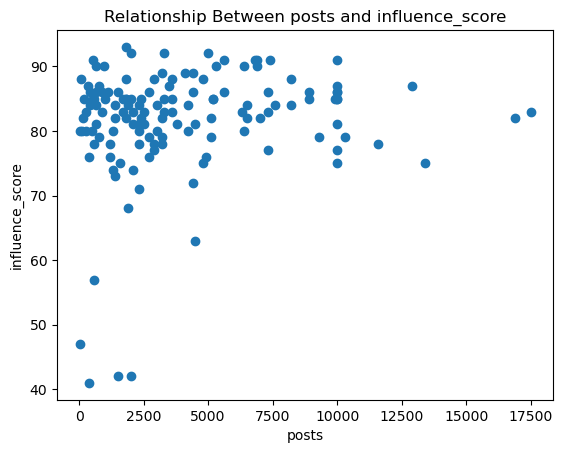

In [66]:
plt.scatter(df['posts'],df['influence_score'])
plt.title('Relationship Between posts and influence_score')
plt.xlabel("posts")
plt.ylabel("influence_score")